In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

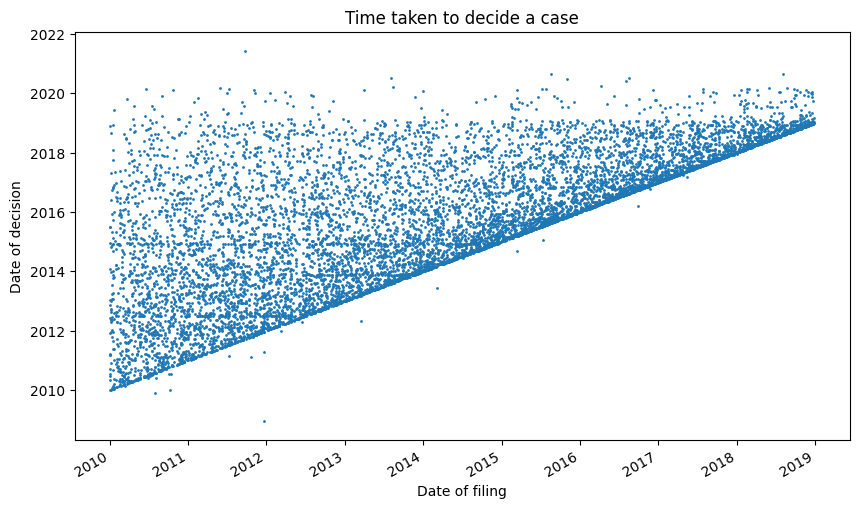

In [6]:
years = range(2010, 2018 + 1)
# years = [2018]

df = pd.DataFrame()

plt.figure(figsize=(10, 6))

df = pd.concat([
    pd.read_csv(f"../csv/cases/cases/small_cases_{year}.csv")[[
        'date_of_filing', 'date_of_decision', 'year'
    ]] for year in years
])

# convert columns to datetime
df['date_of_filing'] = pd.to_datetime(df['date_of_filing'])
# some dates are blank
df['date_of_decision'] = pd.to_datetime(df['date_of_decision'],
                                        errors="coerce")

# drop rows with blank dates
df.dropna(inplace=True)

# random subsample
df = df.sample(10000)

df.set_index('date_of_filing', inplace=True)
df.sort_values(by="date_of_filing", inplace=True)

# scatter plot
plt.scatter(df.index, df['date_of_decision'], s=1)
# df.plot.density()
# plt.broken_barh(df, (0, 100), facecolors='red')

plt.xlabel("Date of filing")
plt.ylabel("Date of decision")
plt.title("Time taken to decide a case")
plt.gcf().autofmt_xdate()
plt.show()
